# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
# Import packages
from __future__ import print_function, division
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os
import json
import urllib
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Check if PUIDATA is present or not and if not set it up
if os.getenv("PUIDATA")==None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    print("Earlier missing now, updated:  PUIdata:", os.getenv("PUIDATA"))
else:
    print("Already present: PUIdata", os.getenv("PUIDATA"))

Already present: PUIdata /nfshome/skp454/PUIdata


In [3]:
# Obtain guardian firearms murders and ownership data
url_firearms="https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv"
df_firearms = pd.read_csv(url_firearms)
df_firearms.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [4]:
# Download mass shooting data
url_massShooting="https://raw.githubusercontent.com/Shivam0712/PUI2018_skp454/master/HW9_skp454/data-pvLFI.csv"
df_massShooting = pd.read_csv(url_massShooting)
df_massShooting.rename(columns={'Guns per 100 inhabitants':'Guns/100 inhabitants','Number of mass shootings (1983-2013)':'Number of mass shootings'},inplace=True)
df_massShooting.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [5]:
# Obtain the world pouplationn data
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
urllib.request.urlretrieve(url, "worldpop.zip")

os.system("mv worldpop.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/worldpop.zip -d worldpop/")
os.system("mv worldpop " + os.getenv("PUIDATA"))

df_worldpop = pd.read_csv(os.getenv("PUIDATA")+'/worldpop/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv', skiprows=4)
df_worldpop = df_worldpop[['Country Name', '2012']]
df_worldpop.rename(columns={'2012':'pop'},inplace=True)
df_worldpop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [6]:
# Obtain the world gdp data
url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
urllib.request.urlretrieve(url, "worldgdp.zip")

os.system("mv worldgdp.zip " + os.getenv("PUIDATA"))
os.system("unzip " + os.getenv("PUIDATA") + "/worldgdp.zip -d worldgdp/")
os.system("mv worldgdp " + os.getenv("PUIDATA"))

df_worldgdp = pd.read_csv(os.getenv("PUIDATA")+'/worldgdp/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', skiprows=4)
df_worldgdp = df_worldgdp[['Country Name', '2012']].dropna()
df_worldgdp.rename(columns={'2012':'gdp'},inplace=True)
df_worldgdp.head()

,Country Name,gdp
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09
5,Arab World,2.786139e+12


In [7]:
# merge the dataframes and only keep useful columns
df_ = df_firearms.merge(df_massShooting, left_on='Country/Territory', right_on='Country', how='inner')
df_ = df_.merge(df_worldpop, left_on='Country/Territory' , right_on='Country Name', how='inner')
df_ = df_.merge(df_worldgdp, left_on='Country/Territory' , right_on='Country Name', how='inner')

#df_ = df_[['Country Name_x', 'Average total all civilian firearms', '2012', 'Number of homicides by firearm','Guns per 100 inhabitants','Number of mass shootings (1983-2013)']]
df_ = df_[['Country', 'Average total all civilian firearms', 'pop', 'gdp' ,'Number of homicides by firearm', 'Guns/100 inhabitants', 'Number of mass shootings']]
df_.head()

,Country,Average total all civilian firearms,pop,gdp,Number of homicides by firearm,Guns/100 inhabitants,Number of mass shootings
0,Australia,3050000.0,22742475.0,1.543411e+12,30.0,15.0,4
1,Austria,2500000.0,8429991.0,4.094252e+11,18.0,30.4,1
2,Belgium,1800000.0,11128246.0,4.978842e+11,70.0,17.2,2
3,Canada,9950000.0,34750545.0,1.824289e+12,173.0,30.8,4
4,Denmark,650000.0,5591572.0,3.271489e+11,15.0,12.0,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


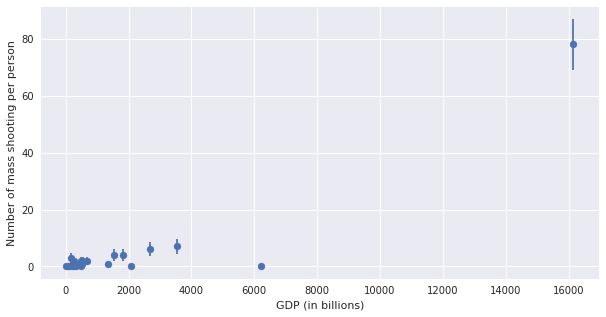

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [8]:
fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


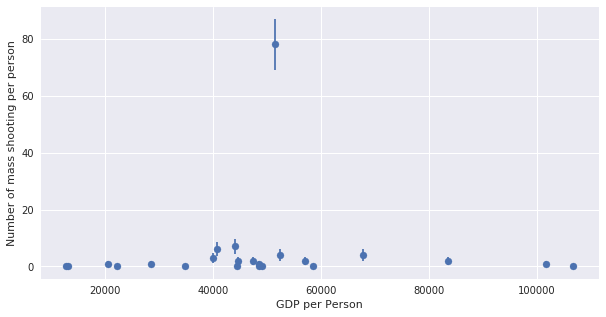

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint in the top middle of the plot is the USA,
 which has medium GDP per person and the highest number of mass shootings


In [9]:
# Define gdp per person
df_['gdppp']=df_['gdp'] / df_['pop']

fig = plt.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdppp'], df_['Number of mass shootings'])
ax.errorbar(df_['gdppp'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per Person")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
plt.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint in the top middle of the plot is the USA,\n " + 
       "which has medium GDP per person and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [18]:
# Create shootingspp
df_['shootingspp'] = df_['Number of mass shootings'] / df_['pop']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


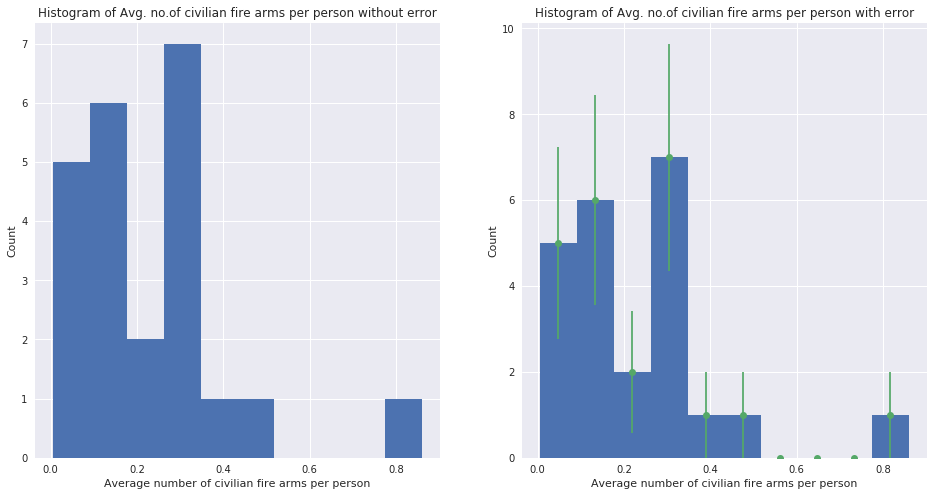

The above plot shows the distributions on average number of fire arms per person withouth and with errors. In most of the countries this average is below 0.5 and only in 1 outlier country it is 0.8 which is USA.


In [11]:
# Avg. Civilian firearms per person
df_['Average Civilian Firearms'] = df_["Average total all civilian firearms"] / df_['pop']

#plots with and without error
np.random.seed(121)

plt.figure(figsize=(16, 8))

plt.subplot(121)
counts,bin_edges = np.histogram(df_['Average Civilian Firearms'],10)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
plt.hist(df_['Average Civilian Firearms'],10)
#plt.errorbar(bin_centres, counts, yerr=err, fmt='o')


plt.xlabel('Average number of civilian fire arms per person');
plt.ylabel('Count')
plt.title("Histogram of Avg. no.of civilian fire arms per person without error")

plt.subplot(122)
plt.hist(df_['Average Civilian Firearms'],10)
plt.errorbar(bin_centres, counts, yerr=err, fmt='o')

plt.xlabel('Average number of civilian fire arms per person');
plt.ylabel('Count')
plt.title("Histogram of Avg. no.of civilian fire arms per person with error")
plt.show()
print("The above plot shows the distributions on average number of fire arms per person withouth and with errors. In most of the countries this average is below 0.5 and only in 1 outlier country it is 0.8 which is USA.")



## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


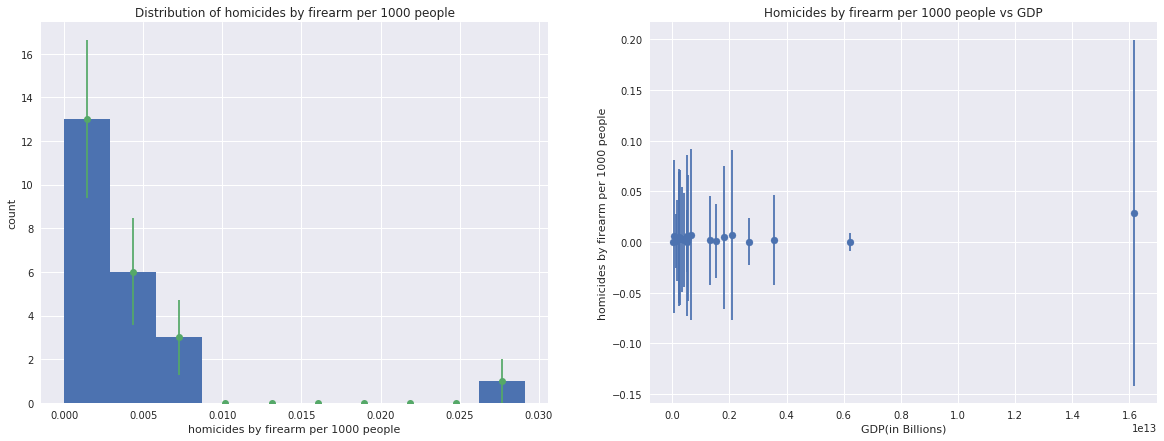

Homicides by firearm per 1000 people vs GDP, errors represent Poisson statistics.
The datapoint in the left of the plot is the USA. 
 USA has highest average of homicide per 1000 people at 0.03,  USA has highest gdp and highest average of homicide per 1000 people.


In [12]:
fig, ax = plt.subplots(figsize=(20,7))

plt.subplot(121)
counts,bin_edges = np.histogram(df_['Number of homicides by firearm'] / df_['pop'] * 1000 ,10)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
plt.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000,10)
plt.errorbar(bin_centres, counts, yerr=err, fmt='o')
plt.xlabel('homicides by firearm per 1000 people');
plt.ylabel('count')
plt.title("Distribution of homicides by firearm per 1000 people")


ax = fig.add_subplot(122)

scatter = ax.scatter(df_['gdp'], df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_['gdp'], df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000), fmt = '.')
ax.set_xlabel("GDP(in Billions)")
ax.set_ylabel('homicides by firearm per 1000 people')
ax.set_ylim()
plt.title("Homicides by firearm per 1000 people vs GDP")
plt.show()
print ("Homicides by firearm per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint in the left of the plot is the USA. \n" + 
       " USA has highest average of homicide per 1000 people at 0.03, "+
       " USA has highest gdp and highest average of homicide per 1000 people.")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [13]:
df_['color']=df_['Country'].apply(lambda x: x == 'United States').astype(int)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


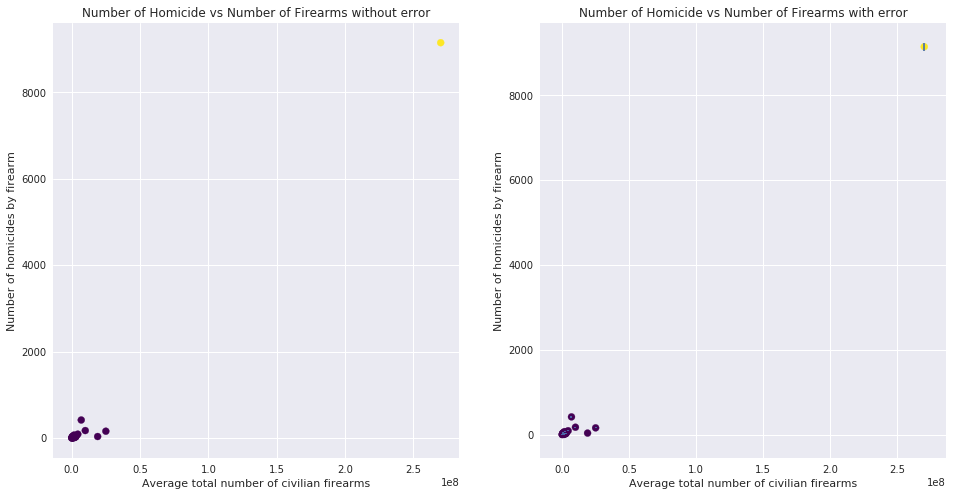

The above plot shows the number of homicides by firearm against total number of civilian firearms.
The point in top right corner is an outlier which is USA,
with highest number of homicides and highest total of civilian firearms


In [14]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], c= df_['color'], cmap='viridis')
plt.xlabel("Average total number of civilian firearms")
plt.ylabel("Number of homicides by firearm")
plt.title("Number of Homicide vs Number of Firearms without error")
plt.subplot(122)

plt.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], yerr = np.sqrt(df_['Number of homicides by firearm']), fmt = ' ')
plt.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], c= df_['color'], cmap='viridis')

plt.title("Number of Homicide vs Number of Firearms with error")
plt.xlabel("Average total number of civilian firearms")
plt.ylabel("Number of homicides by firearm")
plt.show()


print("The above plot shows the number of homicides by firearm against total number of civilian firearms.\n"+
        "The point in top right corner is an outlier which is USA,\n"+ "with highest number of homicides and highest total of civilian firearms")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


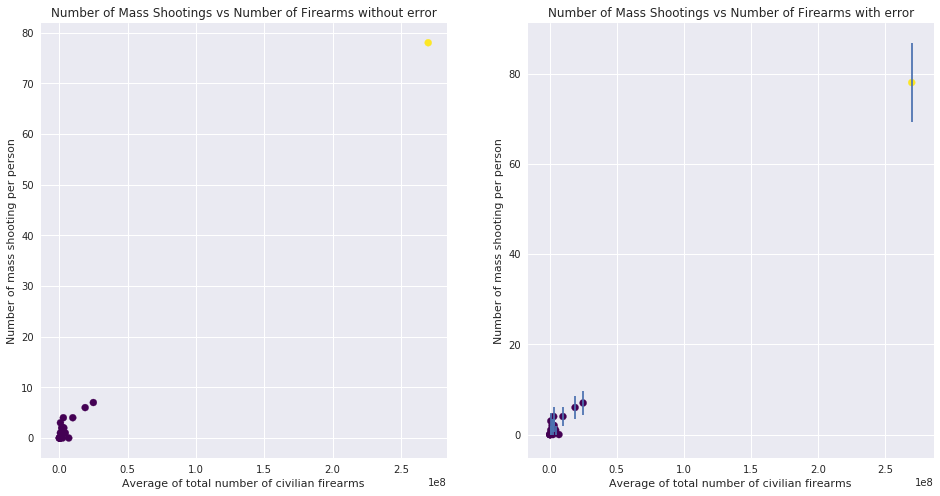

The above plot shows the number of mass shootings against total number of civilian firearms.
The point in top right corner is an outlier which is USA,
with highest number of mass shooting and highest total of civilian firearms


In [15]:
plt.figure(figsize=(16, 8))

plt.subplot(121)
plt.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'], c= df_['color'], cmap='viridis')
plt.xlabel("Average of total number of civilian firearms")
plt.ylabel("Number of mass shooting per person")
plt.title("Number of Mass Shootings vs Number of Firearms without error")
plt.subplot(122)

plt.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'], yerr = np.sqrt(df_['Number of mass shootings']), fmt = ' ')
plt.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'], c= df_['color'], cmap='viridis' )
plt.xlabel("Average of total number of civilian firearms")
plt.ylabel("Number of mass shooting per person")
plt.title("Number of Mass Shootings vs Number of Firearms with error")
plt.show()

print("The above plot shows the number of mass shootings against total number of civilian firearms.\n"+
        "The point in top right corner is an outlier which is USA,\n"+ "with highest number of mass shooting and highest total of civilian firearms")


# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [19]:
# Create total firearmspp
df_['totalfirearmspp']=df_['Average total all civilian firearms']/df_['pop']

# Make both quantities of same scale
df_['Mass Shooting']=df_['shootingspp']/df_['shootingspp'].mean()
df_['Fire Arm']=df_['totalfirearmspp']/df_['totalfirearmspp'].mean()

In [22]:
# OLS Model
smfmodel = smf.ols('y ~ x + const', data={'x':np.array(df_['Fire Arm']), 'y':np.array(df_['Mass Shooting']), 'const':np.ones(len(df_['Fire Arm']))}).fit()
print(" The model has low R-squared and positive coefficient for firearms. Thus, mass shooting can be increasing with increaseing number of firearms per person.")
smfmodel.summary()

 The model has low R-squared and positive coefficient for firearms. Thus, mass shooting can be increasing with increaseing number of firearms per person.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0367
Time:                        21:53:08   Log-Likelihood:                -35.808
No. Observations:                  23   AIC:                             75.62
Df Residuals:                      21   BIC:                             77.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1491      0.201      0.742      0.467        -0.269     0.567
x              0.7019      0.314      2.232      0.037         0.048     1.356
const          0.1491      0.201      0.742      0.467        -0.269     0.567
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                     3.76e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.27e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### To avoid inf weight in WLS:
Weights where error is 0 will be inf. Thus, to avoid this we add 1 to all the error term. Thus, when error is 0 weight becomes 1 and remains more or less same for the other terms.

In [23]:
# WLS model
w = np.sqrt(df_['Mass Shooting'])+ 1
mod_wls = sm.WLS(df_['Mass Shooting'], sm.add_constant(df_['Fire Arm']), weights=1./w).fit()
print(mod_wls.summary())

                            WLS Regression Results                            
Dep. Variable:          Mass Shooting   R-squared:                       0.272
Model:                            WLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     7.834
Date:                Wed, 14 Nov 2018   Prob (F-statistic):             0.0108
Time:                        21:53:18   Log-Likelihood:                -30.267
No. Observations:                  23   AIC:                             64.53
Df Residuals:                      21   BIC:                             66.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0125      0.290     -0.043      0.9

Text(0.5,1,'Scatter Plot with Regression fit and confidence interval')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


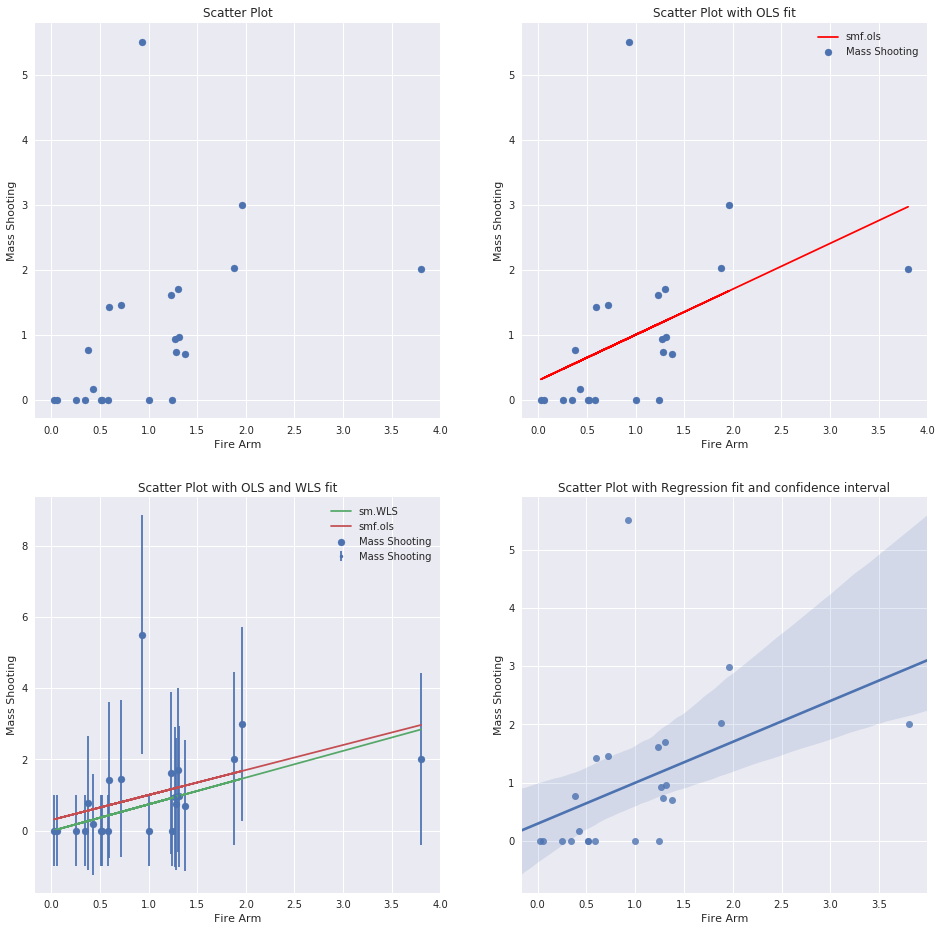

In [24]:
#plots

plt.figure(figsize= (16,16))
plt.subplot(221)
plt.scatter(df_['Fire Arm'],df_['Mass Shooting'])
plt.xlabel("Fire Arm")
plt.ylabel("Mass Shooting")
plt.title("Scatter Plot")

plt.subplot(222)
plt.scatter(df_['Fire Arm'],df_['Mass Shooting'])
#plt.plot(lis_x, mod_wls.fittedvalues, '-', label="sm.WLS")
plt.plot(df_['Fire Arm'], smfmodel.fittedvalues, '-', label="smf.ols", c='red')
plt.xlabel("Fire Arm")
plt.ylabel("Mass Shooting")
plt.title("Scatter Plot with OLS fit")
plt.legend()


plt.subplot(223)
plt.scatter(df_['Fire Arm'],df_['Mass Shooting'])
plt.errorbar(df_['Fire Arm'],df_['Mass Shooting'], yerr=w, fmt='.')
plt.plot(df_['Fire Arm'], mod_wls.fittedvalues, '-', label="sm.WLS")
plt.plot(df_['Fire Arm'], smfmodel.fittedvalues, '-', label="smf.ols")
plt.xlabel("Fire Arm")
plt.ylabel("Mass Shooting")
plt.title("Scatter Plot with OLS and WLS fit")
plt.legend()

plt.subplot(224)
sns.regplot(x='Fire Arm', y= 'Mass Shooting' , data =df_)
plt.title("Scatter Plot with Regression fit and confidence interval")

#### Fig: Model Fitting
1. In the above figure we see, in top right corner the line fits the data thus, minimizing the residual error
2. In bottom left. The WLS model adjusts for the error, penalizing data points with greater error. Thus, the fit is almost parallel to OLS but it gives more weight to the data points with lower errors hence, it fits the normal values rather than outlier.
3. In bottom Right we see the fit with confidence interval. Confidence interval in normal region i.e., 0.0 to 2.0 on x-axis is short and gradually expands when moving towards the outliers. 

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

In [ ]:
plt.figure()
import seaborn  as sns
sns.regplot(x="Fire Arm", y="Mass Shooting", data=df_);

plt.ylabel("Mass shootings")
plt.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


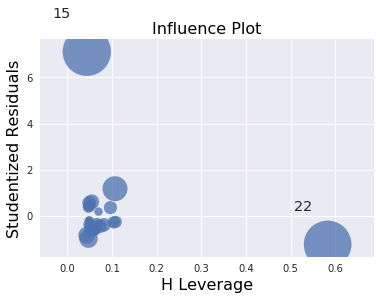

In [25]:
sm.graphics.influence_plot(smfmodel, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings

1. We see in the exploratory part that, in most of the parameters US was standing as a outlier.
2. Mass shooting per person tends to be increasing with increasing number of firearms per person.
3. The slope of the line fitting mass shooting per person and number of firearms per person is influenced by the outlier points on both the axes.